In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
from numpy.fft import fft, fftshift, fftfreq, ifft, ifftshift
pi = np.pi

# Discrete time signal vs Digital signal vs Analog signal
- **Analog signal** -> $x(t)$, $t$ is continious, $x(t)$ is continious
- **Discrete time signal** -> $x[n]$, $n$ is discrete, $x[n]$ is continious
- **Digital signal** -> $x[n]$, $n$ is discrete, $x[n]$ is discrete

For discrete signal, <span style="color:red">$n = 0,~1,~2,~\cdots,~(N-1)$</span> where $N = \mathrm{length}(x)$

# Example of periodic discrete time signal - sinusoids (sin, cos)

For discrete time period signals, digital frequency is defined as 
$$f_{\mathrm{digital}} = \frac{F}{F_s}$$

where $F$ is the original frequency in $\mathrm{Hz}$ and $F_s$ is the sampling frequency in $\mathrm{Hz}$.

Unit of $f_{\mathrm{digital}}$ is $\mathrm{cycles/sample}$

x(t) = cos(2pi*f*t)

In [3]:
np.arange(5)

array([0, 1, 2, 3, 4])

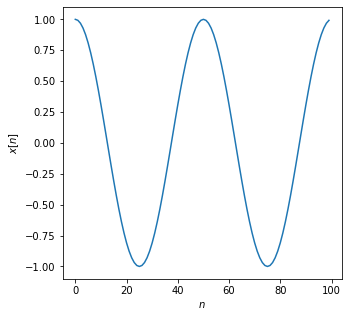

In [4]:
F = 100 # Hz
Fs = 5000 # Sampling Frequency, Hz
f = F/Fs # diqital frequency, cycles/sample. 
# f must be -0.5 <= f < 0.5

N = 100
n = np.arange(N)
x = np.cos(2*pi*f*n)

fig = plt.figure(figsize=(5, 5))
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.show()

# Another interpretation of $f$

0.03
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
(100,)


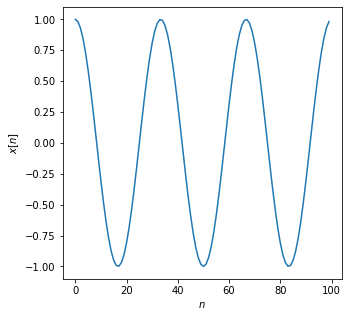

In [5]:
n_cycles = 3 # number of complete cycles we want
N = 100 # total number of samples we have

f = n_cycles/N # cycles/sample
print(f)

n = np.arange(N)
print(n) #
print(n.shape) # number of samples
x = np.cos(2*pi*(1+f)*n)

fig = plt.figure(figsize=(5, 5))
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.show()

### Interactive

In [6]:
@interact
def plot_cosine(n_cycles=(-4, 8, 1)):
    N = 100 

    f = n_cycles/N # cycles/sample
   

    n = np.arange(N)
   
    x = np.sin(2*pi*(1+f)*n)

    fig = plt.figure(figsize=(5, 5))
    plt.plot(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.show()
    

interactive(children=(IntSlider(value=2, description='n_cycles', max=8, min=-4), Output()), _dom_classes=('wid…

# What happens when we change the frequency?

In [7]:
@interact
def plot_sin_change_freq(f_add=(0, 2, 0.01)):
    n_cycles = 3 
    N = 100

    f = n_cycles/N
    x = np.arange(N)
    y = np.cos(2*np.pi*(f_add + f)*x)
    
    plt.stem(x, y)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"cosine with frequency = {f_add+f:.2f} cycle/samples")
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='f_add', max=2.0, step=0.01), Output()), _dom_classes…

# Discrete Fourier Transform 

### Theory
Any signal of length $N$ can be represented as a sum of sinusoids with frequencies $f_0$, $2f_0$, $\cdots$, $(N-1)f_0$, where $f_0 = \frac{1}{N}$.

So from $x[n] = [x_0,~x_1,~\cdots~x_{N-1}]$ we get $X[k] = [X_0,~X_1,~\cdots~X_{N-1}]$, where $X_k$ represents the "magnitude" (i.e. strength) and "phase" (i.e. angle or time delay) of sinusoid with frequence $f_k = kf_0 = \frac{k}{N}$

### Demonstration

In [8]:
%matplotlib notebook
n_cycles = 5
N = 100

f = n_cycles/N
n = np.arange(100)
x = np.cos(2*np.pi*f*n)

# Fast Fourier Transform
X_fft = fft(x)
X_fft = fftshift(X_fft) # to shift the freuqncies from [0, 1] range to [-0.5, 0.5] range
X_fft = X_fft/N # Normalization

fk = fftfreq(N)
fk = fftshift(fk)


fig = plt.figure(figsize=(5, 2))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"sinusoid with f = {f}")

plt.subplot(1, 2, 2)
plt.stem(fk, np.abs(X_fft))
plt.xlabel("Digital frequncy, f")
plt.title("Magnitude of X [normalized]")



plt.show()


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

In [9]:
X_fft = fft(x)
print("Abs:", np.abs(X_fft[:6]))

Abs: [3.83197017e-15 6.24228493e-15 4.94019733e-15 5.89379412e-15
 1.09356572e-14 5.00000000e+01]


In [10]:
print("Abs:", np.angle(X_fft[:6])*pi/180)

Abs: [ 5.48311356e-02 -5.32674544e-02  5.47242961e-02  5.38342097e-02
 -5.48095735e-02 -1.05190626e-17]


In [11]:
fk = fftfreq(N)
fk

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

# Helper Functions

In [12]:
def perform_fft(x, N):
    X = fft(x)
    X = fftshift(X)
    X = X/N # Normalization
    
    fk = fftfreq(N)
    fk = fftshift(fk)
    
    return X, fk
    
def plot_sig_and_fft(x, n, X, fk, f):
    fig = plt.figure(figsize=(5, 2))

    plt.subplot(1, 2, 1)
    plt.stem(n, x)
    plt.xlabel("$n$")
    plt.ylabel("$x[n]$")
    plt.title(f"sinusoid with f = {f}")

    plt.subplot(1, 2, 2)
    plt.stem(fk, np.abs(X))
    plt.xlabel("Digital frequncy, f")
    plt.title("Magnitude of X [normalized]")

# Sum of Sinusoids

In [13]:
n_cycles_1 = 2 
n_cycles_2 = 5
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

In [47]:
n_cycles_1 = 2
n_cycles_2 = 5
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + 3*np.cos(2*np.pi*f2*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

In [15]:
n_cycles_0 = 2 
N = 100

f0 = n_cycles_0/N

n = np.arange(N)
x = np.cos(2*pi*f0*n) \
     - (1/3)*np.cos(2*pi*(3*f0)*n)  \
     + (1/5)*np.cos(2*pi*(5*f0)*n)  \
     - (1/7)*np.cos(2*pi*(7*f0)*n) \
     + (1/9)*np.cos(2*pi*(9*f0)*n) \
     #- (1/11)*np.cos(2*pi*(11*f0)*n)



X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

# Reconstruction using IFFT

In [16]:
%matplotlib inline

In [17]:
def perform_ifft(X, N):
    X_ishift = ifftshift(X)
    x_recon = ifft(X_ishift)
    x_recon = np.real(x_recon)*N
    
    n = np.arange(N)
    if x_recon.shape[0] > N:
        x_recon = x_recon[:N]
    
    return x_recon, n

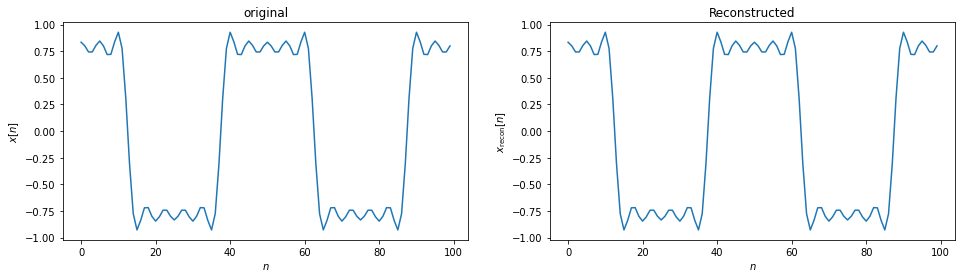

In [18]:
x_reconm, n_recon = perform_ifft(X, N)


fig = plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(n, x)
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.title(f"original")

plt.subplot(1, 2, 2)
plt.plot(n_recon, x_reconm)
plt.xlabel("$n$")
plt.ylabel("$x_{\mathrm{recon}}[n]$")
plt.title("Reconstructed")
plt.show()

# Common DFT Pair

### Pulse

$$DFT\left(\delta[n]\right) = 1$$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


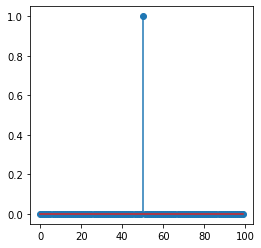

In [52]:
%matplotlib inline
N = 100
n = np.arange(N)

x = np.zeros_like(n)
x[N//2] = 1

fig = plt.figure(figsize=(4, 4))
plt.stem(n, x)
plt.show()

In [53]:
%matplotlib notebook

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X*N, fk, [])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

### Rectangle

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


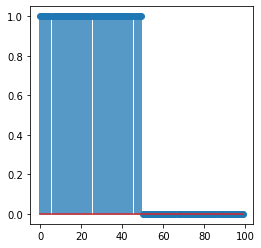

In [54]:
%matplotlib inline
N = 100
n = np.arange(N)

x = np.zeros_like(n)
x[n < N//2] = 1

fig = plt.figure(figsize=(4, 4))
plt.stem(n, x)
plt.show()

In [55]:
%matplotlib notebook
X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

# Changing resolution - zero padding

So far we have used $N = 100$, which means the smallest frequency is $1/N = 1/100 = 0.01$

This means the FFT can differentiate between frequencies with a minimum difference of 0.01 cycles/sample

What if the frequency is in between, say 0.035?

In [23]:
N = 100
res = 1/N
print(res)

0.01


In [56]:
f = 0.035
n = np.arange(N)
x = np.cos(2*np.pi*f*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

So the frequncy "leaks" because resolution is not high enough

How to increase resolution? By artificially changing $N$, i.e., Zero padding

For example, if we add additional 100 zeros, the signal would remain same but with additional zeros, and the new minimum frequency would be $1/N_{eq} = 1/200 = 0.005$

(100,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199]


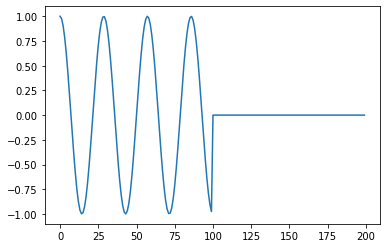

In [25]:
%matplotlib inline
N_zeros = 100
x_zero_padded = np.concatenate([x, np.zeros(N_zeros)])
n_zero_padded = np.concatenate([n, np.arange(N, N+N_zeros)])
#x_zero_padded = np.cos(2*pi*f*n_zero_padded)
print(x.shape)
print(n_zero_padded)
plt.plot(n_zero_padded, x_zero_padded)

In [26]:
%matplotlib notebook

In [27]:
X, fk = perform_fft(x_zero_padded, N + N_zeros)
plot_sig_and_fft(x_zero_padded, n_zero_padded, X, fk, [])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

In [28]:
N_zeros = 100

In [29]:
fk

array([-0.5  , -0.495, -0.49 , -0.485, -0.48 , -0.475, -0.47 , -0.465,
       -0.46 , -0.455, -0.45 , -0.445, -0.44 , -0.435, -0.43 , -0.425,
       -0.42 , -0.415, -0.41 , -0.405, -0.4  , -0.395, -0.39 , -0.385,
       -0.38 , -0.375, -0.37 , -0.365, -0.36 , -0.355, -0.35 , -0.345,
       -0.34 , -0.335, -0.33 , -0.325, -0.32 , -0.315, -0.31 , -0.305,
       -0.3  , -0.295, -0.29 , -0.285, -0.28 , -0.275, -0.27 , -0.265,
       -0.26 , -0.255, -0.25 , -0.245, -0.24 , -0.235, -0.23 , -0.225,
       -0.22 , -0.215, -0.21 , -0.205, -0.2  , -0.195, -0.19 , -0.185,
       -0.18 , -0.175, -0.17 , -0.165, -0.16 , -0.155, -0.15 , -0.145,
       -0.14 , -0.135, -0.13 , -0.125, -0.12 , -0.115, -0.11 , -0.105,
       -0.1  , -0.095, -0.09 , -0.085, -0.08 , -0.075, -0.07 , -0.065,
       -0.06 , -0.055, -0.05 , -0.045, -0.04 , -0.035, -0.03 , -0.025,
       -0.02 , -0.015, -0.01 , -0.005,  0.   ,  0.005,  0.01 ,  0.015,
        0.02 ,  0.025,  0.03 ,  0.035,  0.04 ,  0.045,  0.05 ,  0.055,
      

# THE TOPICS BELOW ARE NOT SHOWN IN THE LAB YET.

# THEY WILL BE DISCUSSED AFTER MIDTERM

# Filtering

In signal processing, a digital filter is a system that performs mathematical operations on a sampled, discrete-time signal to reduce or enhance certain aspects of that signal, especially in the frequency domain

![The-four-common-filters-a-Low-pass-filter-passes-signals-with-a-frequency-lower-than.png](attachment:The-four-common-filters-a-Low-pass-filter-passes-signals-with-a-frequency-lower-than.png)

In [30]:
n_cycles_1 = 2 
n_cycles_2 = 10
n_cycles_3 = 20
N = 100

f1 = n_cycles_1/N
f2 = n_cycles_2/N
f3 = n_cycles_3/N
n = np.arange(N)
x = np.cos(2*np.pi*f1*n) + np.cos(2*np.pi*f2*n) + np.cos(2*np.pi*f3*n)

X, fk = perform_fft(x, N)
plot_sig_and_fft(x, n, X, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

### Low pass

#### Ideal

In [31]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_ideal[fk>=0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
X_filtered_1 = X*H_lp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

#### Butterworth filter

In [33]:
f_thres = 0.05

N_ord = 8
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_lp_butter[fk>=0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
X_filtered_1 = X*H_lp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

### High pass

#### Ideal

In [35]:
f_thres = 0.05

H_lp_ideal = np.zeros_like(fk)
H_lp_ideal[np.abs(fk) <= f_thres] = 1

H_hp_ideal = 1 - H_lp_ideal

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_hp_ideal[fk>=0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
X_filtered_1 = X*H_hp_ideal
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

#### Butterworth

In [37]:
f_thres = 0.05

N_ord = 2
H_lp_butter = 1/np.sqrt(1 + (fk/f_thres)**(2*N_ord))
H_hp_butter = 1 - H_lp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk, H_hp_butter)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
X_filtered_1 = X*H_hp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

### Bandpass

In [39]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2

fig = plt.figure(figsize=(3, 3))
plt.plot(fk[fk>=0], H_bp_butter[fk>=0])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
X_filtered_1 = X*H_bp_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>

### Bandstop

In [41]:
f_thres_high = 0.15
f_thres_low = 0.05

N_ord = 16
H_lp_1 = 1/np.sqrt(1 + (fk/f_thres_high)**(2*N_ord))
H_lp_2 = 1/np.sqrt(1 + (fk/f_thres_low)**(2*N_ord))
H_bp_butter = H_lp_1 - H_lp_2
H_br_butter = 1 - H_bp_butter

fig = plt.figure(figsize=(3, 3))
plt.plot(fk, H_br_butter)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
X_filtered_1 = X*H_br_butter
x_recon, n_recon = perform_ifft(X_filtered_1, N)
plot_sig_and_fft(x_recon, n_recon, X_filtered_1, fk, [f1, f2, f3])

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<IPython.core.display.Javascript object>